<a href="https://colab.research.google.com/github/Adarsh25b/House-price-prediction-using-advance-regression-/blob/main/Model_Selection_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel("data1.xlsx")
df.head()

,x_Fe,x_Cr,x_Co,x_V,x_Mn,x_Al,x_Ni,ΔSmix,ΔHmix,VEC,Δχ,δ,Density,Avg_MeltingPoint,Avg_BulkModulus,Avg_Hardness,Target
0,0.25,0.05,0.05,0.05,0.02,0.02,0.56,10.618506,-6.3604,8.80,0.096626,0.051622,7779.325595,1776.02874,172.22,661.28,FCC
1,0.25,0.05,0.05,0.05,0.02,0.04,0.54,11.105374,-7.5532,8.66,0.101814,0.051941,7654.702131,1760.13748,170.14,653.67,FCC
2,0.25,0.05,0.05,0.05,0.02,0.06,0.52,11.499071,-8.6756,8.52,0.106413,0.052253,7527.738295,1744.24622,168.06,646.06,FCC
3,0.25,0.05,0.05,0.05,0.02,0.08,0.50,11.829865,-9.7276,8.38,0.110496,0.052558,7398.621195,1728.35496,165.98,638.45,FCC
4,0.25,0.05,0.05,0.05,0.04,0.02,0.54,11.105374,-6.5644,8.74,0.104859,0.053395,7711.655173,1771.84874,171.02,658.52,FCC


In [2]:
nx=df[['x_Fe', 'x_Cr', 'x_Co', 'x_V', 'x_Mn', 'x_Al', 'x_Ni', 'ΔSmix', 'VEC', 'Density', 'Avg_BulkModulus']]
nx.head()

,x_Fe,x_Cr,x_Co,x_V,x_Mn,x_Al,x_Ni,ΔSmix,VEC,Density,Avg_BulkModulus
0,0.25,0.05,0.05,0.05,0.02,0.02,0.56,10.618506,8.80,7779.325595,172.22
1,0.25,0.05,0.05,0.05,0.02,0.04,0.54,11.105374,8.66,7654.702131,170.14
2,0.25,0.05,0.05,0.05,0.02,0.06,0.52,11.499071,8.52,7527.738295,168.06
3,0.25,0.05,0.05,0.05,0.02,0.08,0.50,11.829865,8.38,7398.621195,165.98
4,0.25,0.05,0.05,0.05,0.04,0.02,0.54,11.105374,8.74,7711.655173,171.02


In [3]:
ny=df["Target"]
ny.head()

0    FCC
1    FCC
2    FCC
3    FCC
4    FCC
Name: Target, dtype: object

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
clm=nx.columns
sx=mms.fit_transform(nx)
sx=pd.DataFrame(sx)
sx.columns=clm
sx.head(5)

,x_Fe,x_Cr,x_Co,x_V,x_Mn,x_Al,x_Ni,ΔSmix,VEC,Density,Avg_BulkModulus
0,0.0,0.0,0.0,0.0,0.25,0.000000,0.961538,0.128286,0.965517,0.934821,0.923274
1,0.0,0.0,0.0,0.0,0.25,0.333333,0.923077,0.214634,0.885057,0.818229,0.790281
2,0.0,0.0,0.0,0.0,0.25,0.666667,0.884615,0.284458,0.804598,0.699447,0.657289
3,0.0,0.0,0.0,0.0,0.25,1.000000,0.846154,0.343126,0.724138,0.578651,0.524297
4,0.0,0.0,0.0,0.0,0.50,0.000000,0.923077,0.214634,0.931034,0.871511,0.846547


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(sx,ny,test_size=0.2,stratify=ny)

In [ ]:
def res(model):
    model.fit(X_train,y_train)
    print("\nClassifiaction : ",model)
    y_pre=model.predict(X_test)
    print("Accuracy       : ",accuracy_score(y_test,y_pre))
    print("Report         : \n",classification_report(y_test,y_pre))
    print(pd.crosstab(y_test,y_pre))
    print('\n')

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
oversampled_X, oversampled_y = sm.fit_resample(X_train,y_train)

In [ ]:
def res_smt(model):
    model.fit(oversampled_X,oversampled_y)
    print("\nClassifiaction : ",model)
    y_prs=model.predict(X_test)
    print("Accuracy       : ",accuracy_score(y_test,y_prs))
    print("Report         : \n",classification_report(y_test,y_prs))
    print(pd.crosstab(y_test,y_prs))
    print('\n')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters = {
    "gb__n_estimators":[50,100,250,500,1000],
    
    "gb__learning_rate":[0.01,0.1,1]
}
pipeline = Pipeline([("smote", SMOTE()), ("gb", GradientBoostingClassifier())])

kf = StratifiedKFold(n_splits=2)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=kf,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9825351445849129
Test score: 0.9877315973960942


In [ ]:
df1 = pd.DataFrame(grid_search.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gb__learning_rate,param_gb__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,21.166068,0.086502,0.056714,0.001296,0.01,50,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.929144,0.932015,0.930579,0.001435,15
1,41.892835,0.030280,0.090522,0.005946,0.01,100,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.937531,0.936146,0.936839,0.000693,14
2,105.034065,0.036034,0.200019,0.000076,0.01,250,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.959815,0.959184,0.959499,0.000316,12
3,210.049931,0.476312,0.349431,0.008979,0.01,500,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.974086,0.974458,0.974272,0.000186,11
4,420.491392,0.645877,0.656841,0.003782,0.01,1000,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.980220,0.979216,0.979718,0.000502,7
5,21.199397,0.092128,0.055403,0.000917,0.1,50,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.974462,0.976086,0.975274,0.000812,10
6,42.319545,0.212970,0.084316,0.000637,0.1,100,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.980346,0.978715,0.979530,0.000815,8
7,104.954932,0.326985,0.179176,0.005655,0.1,250,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.981597,0.980969,0.981283,0.000314,3
8,210.126552,0.689088,0.319477,0.003440,0.1,500,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.983600,0.981470,0.982535,0.001065,1
9,387.331477,7.667615,0.597535,0.011419,0.1,1000,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.982724,0.981219,0.981972,0.000752,2


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters = {
    "RF__n_estimators":[100,200,300,400,500],
    
    "RF__max_features":['sqrt','log2']
}
pipeline = Pipeline([("smote", SMOTE()), ("RF", RandomForestClassifier())])

kf = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=kf,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9824100156494522
Test score: 0.9864797195793691


In [ ]:
df2 = pd.DataFrame(grid_search.cv_results_)
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF__max_features,param_RF__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.699934,0.122263,0.103042,0.000346,sqrt,100,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.981221,0.983850,0.980094,0.981721,0.001574,7
1,18.019354,0.475284,0.189856,0.000271,sqrt,200,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.980845,0.984038,0.980094,0.981659,0.001710,8
2,25.729140,0.221795,0.292358,0.005309,sqrt,300,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.981596,0.984789,0.979906,0.982097,0.002025,3
3,35.241389,0.346875,0.376019,0.006862,sqrt,400,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.980845,0.984225,0.980469,0.981847,0.001689,6
4,42.741707,0.713731,0.464414,0.008274,sqrt,500,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.981972,0.984038,0.981221,0.982410,0.001191,1
5,8.646739,0.060323,0.104029,0.002166,log2,100,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.979718,0.984038,0.978592,0.980782,0.002347,10
6,17.702996,0.706002,0.196249,0.003947,log2,200,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.981596,0.983474,0.979718,0.981596,0.001533,9
7,26.002041,0.871107,0.287673,0.009265,log2,300,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.981784,0.984225,0.980094,0.982034,0.001696,4
8,34.151700,0.514760,0.375063,0.002977,log2,400,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.980845,0.984413,0.980657,0.981972,0.001728,5
9,41.830408,2.310456,0.424508,0.061764,log2,500,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.981033,0.984977,0.981033,0.982347,0.001859,2


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters = {
    "DT__criterion" : ['gini', 'entropy'],
    "DT__max_depth" : [1,2,3,5,10,20,50]
}
pipeline = Pipeline([("smote", SMOTE()), ("DT", DecisionTreeClassifier())])

kf = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=kf,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9770892018779342
Test score: 0.9779669504256384


In [ ]:
df3 = pd.DataFrame(grid_search.cv_results_)
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__criterion,param_DT__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.357764,0.004137,0.021466,0.007369,gini,1,"{'DT__criterion': 'gini', 'DT__max_depth': 1}",0.830423,0.830423,0.830235,0.830360,0.000089,11
1,0.433334,0.010580,0.005208,0.007366,gini,2,"{'DT__criterion': 'gini', 'DT__max_depth': 2}",0.166009,0.164507,0.160000,0.163505,0.002553,14
2,0.500433,0.002529,0.015824,0.000274,gini,3,"{'DT__criterion': 'gini', 'DT__max_depth': 3}",0.867042,0.862535,0.893521,0.874366,0.013669,9
3,0.615193,0.013760,0.015882,0.000361,gini,5,"{'DT__criterion': 'gini', 'DT__max_depth': 5}",0.935211,0.937089,0.937653,0.936651,0.001044,8
4,0.792442,0.037758,0.016378,0.000530,gini,10,"{'DT__criterion': 'gini', 'DT__max_depth': 10}",0.963192,0.964131,0.966009,0.964444,0.001171,6
5,1.025364,0.046936,0.018479,0.005974,gini,20,"{'DT__criterion': 'gini', 'DT__max_depth': 20}",0.977840,0.973146,0.975962,0.975649,0.001929,3
6,1.206988,0.056540,0.027234,0.011774,gini,50,"{'DT__criterion': 'gini', 'DT__max_depth': 50}",0.975023,0.974648,0.975023,0.974898,0.000177,4
7,0.539171,0.068523,0.043066,0.010588,entropy,1,"{'DT__criterion': 'entropy', 'DT__max_depth': 1}",0.830423,0.013521,0.013521,0.285822,0.385091,13
8,0.741783,0.075809,0.022570,0.007574,entropy,2,"{'DT__criterion': 'entropy', 'DT__max_depth': 2}",0.165258,0.165070,0.831174,0.387167,0.313960,12
9,0.794270,0.018687,0.005891,0.006938,entropy,3,"{'DT__criterion': 'entropy', 'DT__max_depth': 3}",0.870798,0.852394,0.897653,0.873615,0.018584,10


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters = {
    "sv__C": [100,250,500,750,1000,1250,1500],
    "sv__kernel":['linear', 'poly', 'rbf']
}
pipeline = Pipeline([("smote", SMOTE()), ("sv", SVC())])

kf = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=kf,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9939906103286384
Test score: 0.9967451176765147


In [ ]:
df4 = pd.DataFrame(grid_search.cv_results_)
df4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sv__C,param_sv__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.985229,0.078065,0.422762,0.022116,100,linear,"{'sv__C': 100, 'sv__kernel': 'linear'}",0.975587,0.972770,0.972958,0.973772,0.001286,21
1,6.757667,0.719881,0.175888,0.023611,100,poly,"{'sv__C': 100, 'sv__kernel': 'poly'}",0.990610,0.991737,0.989296,0.990548,0.000998,7
2,3.526685,0.092325,1.084459,0.059629,100,rbf,"{'sv__C': 100, 'sv__kernel': 'rbf'}",0.988545,0.987793,0.987230,0.987856,0.000538,8
3,6.998755,0.245816,0.413368,0.027548,250,linear,"{'sv__C': 250, 'sv__kernel': 'linear'}",0.976150,0.972207,0.973146,0.973834,0.001682,20
4,10.283889,1.799315,0.141431,0.012574,250,poly,"{'sv__C': 250, 'sv__kernel': 'poly'}",0.991174,0.994366,0.991549,0.992363,0.001425,6
5,3.656902,0.080800,0.846971,0.029012,250,rbf,"{'sv__C': 250, 'sv__kernel': 'rbf'}",0.985915,0.988169,0.985352,0.986479,0.001217,11
6,7.925212,0.205653,0.366747,0.011036,500,linear,"{'sv__C': 500, 'sv__kernel': 'linear'}",0.975962,0.973897,0.973897,0.974585,0.000974,18
7,14.722937,2.935620,0.158112,0.034537,500,poly,"{'sv__C': 500, 'sv__kernel': 'poly'}",0.992676,0.993803,0.992676,0.993052,0.000531,5
8,3.989852,0.125908,0.861087,0.037141,500,rbf,"{'sv__C': 500, 'sv__kernel': 'rbf'}",0.986479,0.987981,0.985352,0.986604,0.001077,9
9,10.101086,0.255487,0.372389,0.007097,750,linear,"{'sv__C': 750, 'sv__kernel': 'linear'}",0.976150,0.974085,0.974648,0.974961,0.000872,15


In [ ]:
res_smt(SVC(kernel='poly',C=1000))


Classifiaction :  SVC(C=1000, kernel='poly')
Accuracy       :  0.9952428642964447
Report         : 
               precision    recall  f1-score   support

         BCC       0.86      0.90      0.88        20
         FCC       1.00      1.00      1.00      3296
     FCC+BCC       0.99      0.98      0.99       644
          IM       1.00      1.00      1.00        34

    accuracy                           1.00      3994
   macro avg       0.96      0.97      0.97      3994
weighted avg       1.00      1.00      1.00      3994

col_0    BCC   FCC  FCC+BCC  IM
Target                         
BCC       18     0        2   0
FCC        0  3289        7   0
FCC+BCC    3     7      634   0
IM         0     0        0  34




In [ ]:
res_smt(SVC(kernel='poly',C=5000))


Classifiaction :  SVC(C=5000, kernel='poly')
Accuracy       :  0.9972458688032048
Report         : 
               precision    recall  f1-score   support

         BCC       0.86      0.90      0.88        20
         FCC       1.00      1.00      1.00      3296
     FCC+BCC       0.99      0.99      0.99       644
          IM       1.00      1.00      1.00        34

    accuracy                           1.00      3994
   macro avg       0.96      0.97      0.97      3994
weighted avg       1.00      1.00      1.00      3994

col_0    BCC   FCC  FCC+BCC  IM
Target                         
BCC       18     0        2   0
FCC        0  3294        2   0
FCC+BCC    3     4      637   0
IM         0     0        0  34




In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters = {
    "GNB__var_smoothing": [1e-7,1e-8,5e-9,1e-9,5e-10,1e-11]
}
pipeline = Pipeline([("smote", SMOTE()), ("GNB", GaussianNB())])

kf = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=kf,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.8931455399061033
Test score: 0.8883324987481221


In [ ]:
df5 = pd.DataFrame(grid_search.cv_results_)
df5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_GNB__var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.313721,0.027045,0.015623,2.973602e-07,0.0,{'GNB__var_smoothing': 1e-07},0.895962,0.892958,0.888826,0.892582,0.002925,2
1,0.322964,0.006714,0.015623,1.700793e-06,0.0,{'GNB__var_smoothing': 1e-08},0.896714,0.892770,0.887700,0.892394,0.003690,5
2,0.310935,0.003845,0.021637,8.501469e-03,0.0,{'GNB__var_smoothing': 5e-09},0.895775,0.892019,0.889577,0.892457,0.002549,3
3,0.308679,0.006397,0.017541,4.194847e-03,0.0,{'GNB__var_smoothing': 1e-09},0.897277,0.892958,0.889202,0.893146,0.003299,1
4,0.310416,0.015108,0.005868,8.299108e-03,0.0,{'GNB__var_smoothing': 5e-10},0.895399,0.893709,0.888263,0.892457,0.003045,4
5,0.268747,0.024302,0.015624,1.106929e-06,0.0,{'GNB__var_smoothing': 1e-11},0.895587,0.891831,0.888451,0.891956,0.002915,6


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters = {
    "LR__C":[5000,1000,100, 10, 1],
    "LR__solver":['newton-cg', 'lbfgs', 'liblinear']
}
pipeline = Pipeline([("smote", SMOTE()), ("LR",LogisticRegression())])

kf = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=kf,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9710798122065728
Test score: 0.9747120681021533


In [ ]:
df6 = pd.DataFrame(grid_search.cv_results_)
df6

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LR__C,param_LR__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.552527,0.437894,0.015920,4.164676e-04,5000,newton-cg,"{'LR__C': 5000, 'LR__solver': 'newton-cg'}",0.973333,0.969014,0.970892,0.971080,0.001768,1
1,2.190014,0.021659,0.005209,7.366145e-03,5000,lbfgs,"{'LR__C': 5000, 'LR__solver': 'lbfgs'}",0.967324,0.964319,0.963568,0.965070,0.001623,4
2,1.953763,0.089049,0.005208,7.364572e-03,5000,liblinear,"{'LR__C': 5000, 'LR__solver': 'liblinear'}",0.940094,0.935775,0.934460,0.936776,0.002407,11
3,11.154900,0.315853,0.015416,2.938491e-04,1000,newton-cg,"{'LR__C': 1000, 'LR__solver': 'newton-cg'}",0.972958,0.969202,0.969202,0.970454,0.001771,2
4,2.106724,0.013937,0.015629,7.682194e-06,1000,lbfgs,"{'LR__C': 1000, 'LR__solver': 'lbfgs'}",0.966197,0.964883,0.962066,0.964382,0.001723,6
5,1.950602,0.019720,0.015624,4.052337e-07,1000,liblinear,"{'LR__C': 1000, 'LR__solver': 'liblinear'}",0.939343,0.935399,0.933146,0.935962,0.002561,12
6,9.431385,0.457231,0.016334,1.002252e-03,100,newton-cg,"{'LR__C': 100, 'LR__solver': 'newton-cg'}",0.969390,0.967887,0.964883,0.967387,0.001874,3
7,2.130043,0.030161,0.010417,7.365977e-03,100,lbfgs,"{'LR__C': 100, 'LR__solver': 'lbfgs'}",0.967136,0.964883,0.961315,0.964444,0.002397,5
8,1.717066,0.029312,0.010421,7.368451e-03,100,liblinear,"{'LR__C': 100, 'LR__solver': 'liblinear'}",0.935399,0.929577,0.930329,0.931768,0.002586,13
9,6.551576,0.563055,0.013973,2.332912e-03,10,newton-cg,"{'LR__C': 10, 'LR__solver': 'newton-cg'}",0.966573,0.962817,0.958873,0.962754,0.003144,7


# Curve Plotting

**1. GradientBoostingClassifier**

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gb__learning_rate,param_gb__n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,21.166068,0.086502,0.056714,0.001296,0.01,50,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.929144,0.932015,0.930579,0.001435,15
1,41.892835,0.030280,0.090522,0.005946,0.01,100,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.937531,0.936146,0.936839,0.000693,14
2,105.034065,0.036034,0.200019,0.000076,0.01,250,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.959815,0.959184,0.959499,0.000316,12
3,210.049931,0.476312,0.349431,0.008979,0.01,500,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.974086,0.974458,0.974272,0.000186,11
4,420.491392,0.645877,0.656841,0.003782,0.01,1000,"{'gb__learning_rate': 0.01, 'gb__n_estimators'...",0.980220,0.979216,0.979718,0.000502,7
5,21.199397,0.092128,0.055403,0.000917,0.1,50,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.974462,0.976086,0.975274,0.000812,10
6,42.319545,0.212970,0.084316,0.000637,0.1,100,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.980346,0.978715,0.979530,0.000815,8
7,104.954932,0.326985,0.179176,0.005655,0.1,250,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.981597,0.980969,0.981283,0.000314,3
8,210.126552,0.689088,0.319477,0.003440,0.1,500,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.983600,0.981470,0.982535,0.001065,1
9,387.331477,7.667615,0.597535,0.011419,0.1,1000,"{'gb__learning_rate': 0.1, 'gb__n_estimators':...",0.982724,0.981219,0.981972,0.000752,2


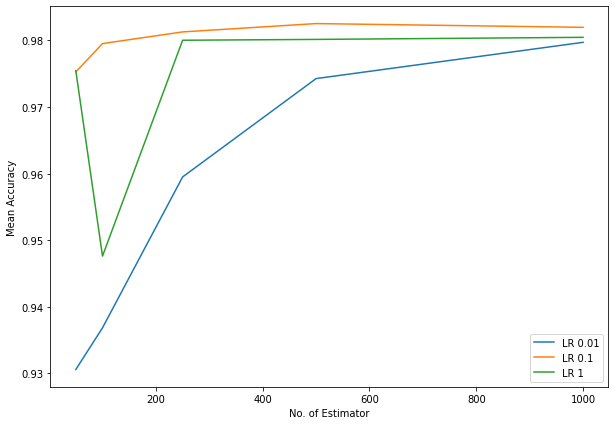

In [ ]:
plt.figure(figsize=(10,7))
x=[50,100,250,500,1000]
y=df1["mean_test_score"].values
plt.xlabel("No. of Estimator")
plt.ylabel("Mean Accuracy")
plt.plot(x,y[0:5],label='LR 0.01')
plt.plot(x,y[5:10],label='LR 0.1')
plt.plot(x,y[10:15],label='LR 1')
plt.legend()
plt.savefig('GBc.jpg',dpi=300,bbox_inches='tight')

**2. RandomForestClassifier**

In [ ]:
df2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF__max_features,param_RF__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,8.699934,0.122263,0.103042,0.000346,sqrt,100,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.981221,0.983850,0.980094,0.981721,0.001574,7
1,18.019354,0.475284,0.189856,0.000271,sqrt,200,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.980845,0.984038,0.980094,0.981659,0.001710,8
2,25.729140,0.221795,0.292358,0.005309,sqrt,300,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.981596,0.984789,0.979906,0.982097,0.002025,3
3,35.241389,0.346875,0.376019,0.006862,sqrt,400,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.980845,0.984225,0.980469,0.981847,0.001689,6
4,42.741707,0.713731,0.464414,0.008274,sqrt,500,"{'RF__max_features': 'sqrt', 'RF__n_estimators...",0.981972,0.984038,0.981221,0.982410,0.001191,1
5,8.646739,0.060323,0.104029,0.002166,log2,100,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.979718,0.984038,0.978592,0.980782,0.002347,10
6,17.702996,0.706002,0.196249,0.003947,log2,200,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.981596,0.983474,0.979718,0.981596,0.001533,9
7,26.002041,0.871107,0.287673,0.009265,log2,300,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.981784,0.984225,0.980094,0.982034,0.001696,4
8,34.151700,0.514760,0.375063,0.002977,log2,400,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.980845,0.984413,0.980657,0.981972,0.001728,5
9,41.830408,2.310456,0.424508,0.061764,log2,500,"{'RF__max_features': 'log2', 'RF__n_estimators...",0.981033,0.984977,0.981033,0.982347,0.001859,2


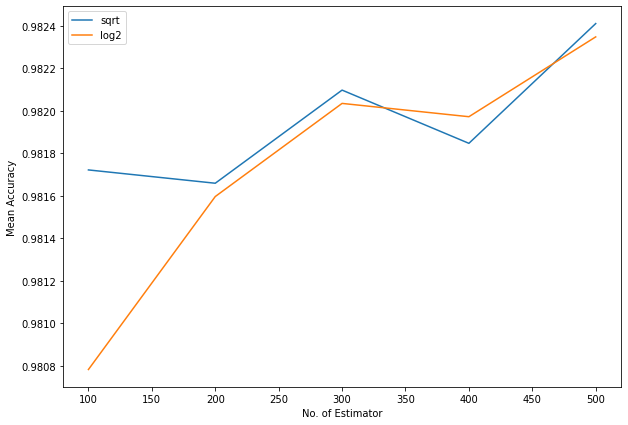

In [ ]:
plt.figure(figsize=(10,7))
x=[100,200,300,400,500]
y=df2["mean_test_score"].values
plt.xlabel("No. of Estimator")
plt.ylabel("Mean Accuracy")
plt.plot(x,y[0:5],label='sqrt')
plt.plot(x,y[5:10],label='log2')
plt.legend()
plt.savefig('RFc.jpg',dpi=300,bbox_inches='tight')

**3. DecisionTreeClassifier**

In [ ]:
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DT__criterion,param_DT__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.357764,0.004137,0.021466,0.007369,gini,1,"{'DT__criterion': 'gini', 'DT__max_depth': 1}",0.830423,0.830423,0.830235,0.830360,0.000089,11
1,0.433334,0.010580,0.005208,0.007366,gini,2,"{'DT__criterion': 'gini', 'DT__max_depth': 2}",0.166009,0.164507,0.160000,0.163505,0.002553,14
2,0.500433,0.002529,0.015824,0.000274,gini,3,"{'DT__criterion': 'gini', 'DT__max_depth': 3}",0.867042,0.862535,0.893521,0.874366,0.013669,9
3,0.615193,0.013760,0.015882,0.000361,gini,5,"{'DT__criterion': 'gini', 'DT__max_depth': 5}",0.935211,0.937089,0.937653,0.936651,0.001044,8
4,0.792442,0.037758,0.016378,0.000530,gini,10,"{'DT__criterion': 'gini', 'DT__max_depth': 10}",0.963192,0.964131,0.966009,0.964444,0.001171,6
5,1.025364,0.046936,0.018479,0.005974,gini,20,"{'DT__criterion': 'gini', 'DT__max_depth': 20}",0.977840,0.973146,0.975962,0.975649,0.001929,3
6,1.206988,0.056540,0.027234,0.011774,gini,50,"{'DT__criterion': 'gini', 'DT__max_depth': 50}",0.975023,0.974648,0.975023,0.974898,0.000177,4
7,0.539171,0.068523,0.043066,0.010588,entropy,1,"{'DT__criterion': 'entropy', 'DT__max_depth': 1}",0.830423,0.013521,0.013521,0.285822,0.385091,13
8,0.741783,0.075809,0.022570,0.007574,entropy,2,"{'DT__criterion': 'entropy', 'DT__max_depth': 2}",0.165258,0.165070,0.831174,0.387167,0.313960,12
9,0.794270,0.018687,0.005891,0.006938,entropy,3,"{'DT__criterion': 'entropy', 'DT__max_depth': 3}",0.870798,0.852394,0.897653,0.873615,0.018584,10


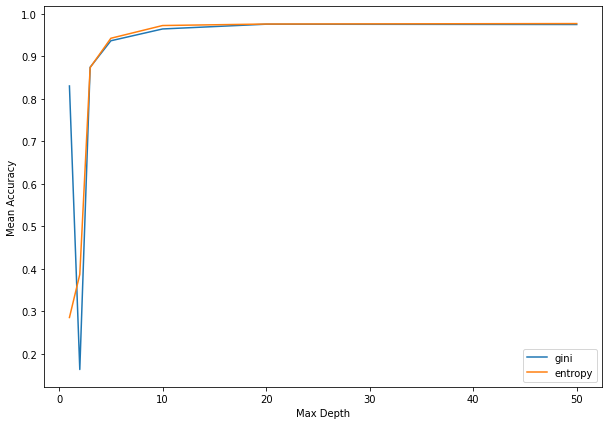

In [ ]:
plt.figure(figsize=(10,7))
x=[1,2,3,5,10,20,50]
y=df3["mean_test_score"].values
plt.xlabel("Max Depth")
plt.ylabel("Mean Accuracy")
plt.plot(x,y[0:7],label='gini')
plt.plot(x,y[7:14],label='entropy')
plt.legend()
plt.savefig('DTc.jpg',dpi=300,bbox_inches='tight')

**4. SVC**

In [ ]:
df4

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sv__C,param_sv__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.985229,0.078065,0.422762,0.022116,100,linear,"{'sv__C': 100, 'sv__kernel': 'linear'}",0.975587,0.972770,0.972958,0.973772,0.001286,21
1,6.757667,0.719881,0.175888,0.023611,100,poly,"{'sv__C': 100, 'sv__kernel': 'poly'}",0.990610,0.991737,0.989296,0.990548,0.000998,7
2,3.526685,0.092325,1.084459,0.059629,100,rbf,"{'sv__C': 100, 'sv__kernel': 'rbf'}",0.988545,0.987793,0.987230,0.987856,0.000538,8
3,6.998755,0.245816,0.413368,0.027548,250,linear,"{'sv__C': 250, 'sv__kernel': 'linear'}",0.976150,0.972207,0.973146,0.973834,0.001682,20
4,10.283889,1.799315,0.141431,0.012574,250,poly,"{'sv__C': 250, 'sv__kernel': 'poly'}",0.991174,0.994366,0.991549,0.992363,0.001425,6
5,3.656902,0.080800,0.846971,0.029012,250,rbf,"{'sv__C': 250, 'sv__kernel': 'rbf'}",0.985915,0.988169,0.985352,0.986479,0.001217,11
6,7.925212,0.205653,0.366747,0.011036,500,linear,"{'sv__C': 500, 'sv__kernel': 'linear'}",0.975962,0.973897,0.973897,0.974585,0.000974,18
7,14.722937,2.935620,0.158112,0.034537,500,poly,"{'sv__C': 500, 'sv__kernel': 'poly'}",0.992676,0.993803,0.992676,0.993052,0.000531,5
8,3.989852,0.125908,0.861087,0.037141,500,rbf,"{'sv__C': 500, 'sv__kernel': 'rbf'}",0.986479,0.987981,0.985352,0.986604,0.001077,9
9,10.101086,0.255487,0.372389,0.007097,750,linear,"{'sv__C': 750, 'sv__kernel': 'linear'}",0.976150,0.974085,0.974648,0.974961,0.000872,15


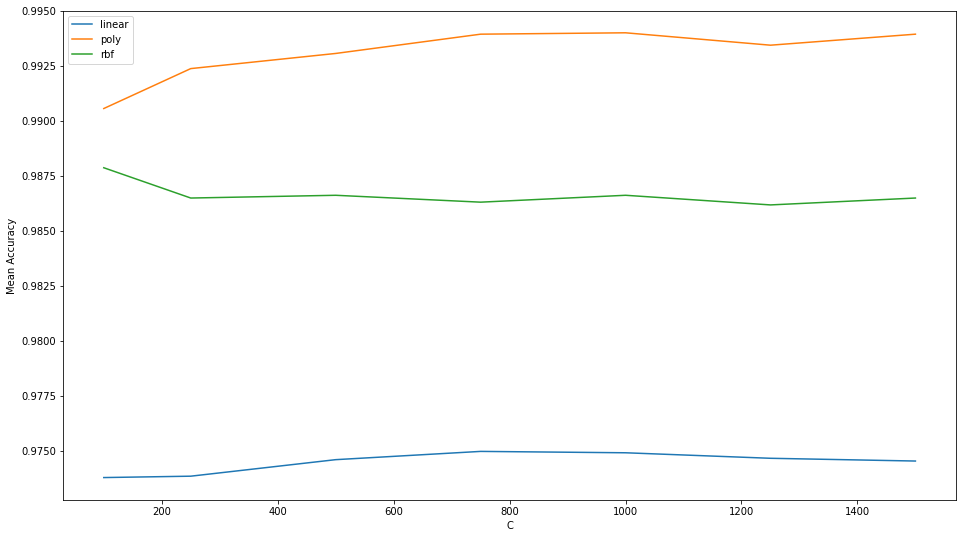

In [ ]:
plt.figure(figsize=(16,9))
x=[100,250,500,750,1000,1250,1500]
y=df4["mean_test_score"].values
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.plot(x,y[0::3],label='linear')
plt.plot(x,y[1::3],label='poly')
plt.plot(x,y[2::3],label='rbf')
plt.legend()
plt.savefig('SVC.jpg',dpi=300,bbox_inches='tight')

**5. GaussianNB**

In [ ]:
df5

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_GNB__var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.313721,0.027045,0.015623,2.973602e-07,0.0,{'GNB__var_smoothing': 1e-07},0.895962,0.892958,0.888826,0.892582,0.002925,2
1,0.322964,0.006714,0.015623,1.700793e-06,0.0,{'GNB__var_smoothing': 1e-08},0.896714,0.892770,0.887700,0.892394,0.003690,5
2,0.310935,0.003845,0.021637,8.501469e-03,0.0,{'GNB__var_smoothing': 5e-09},0.895775,0.892019,0.889577,0.892457,0.002549,3
3,0.308679,0.006397,0.017541,4.194847e-03,0.0,{'GNB__var_smoothing': 1e-09},0.897277,0.892958,0.889202,0.893146,0.003299,1
4,0.310416,0.015108,0.005868,8.299108e-03,0.0,{'GNB__var_smoothing': 5e-10},0.895399,0.893709,0.888263,0.892457,0.003045,4
5,0.268747,0.024302,0.015624,1.106929e-06,0.0,{'GNB__var_smoothing': 1e-11},0.895587,0.891831,0.888451,0.891956,0.002915,6


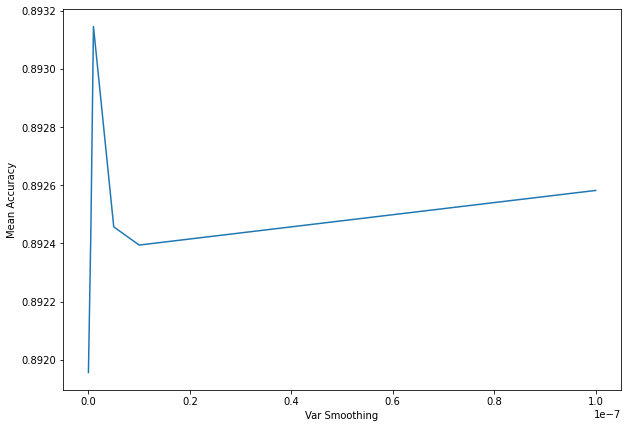

In [ ]:
plt.figure(figsize=(10,7))
x=[1e-7,1e-8,5e-9,1e-9,5e-10,1e-11]
y=df5["mean_test_score"].values
plt.xlabel("Var Smoothing")
plt.ylabel("Mean Accuracy")
plt.plot(x,y)
plt.savefig('GNB.jpg',dpi=300,bbox_inches='tight')

**6. LogisticRegression**

In [ ]:
df6

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LR__C,param_LR__solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,14.552527,0.437894,0.015920,4.164676e-04,5000,newton-cg,"{'LR__C': 5000, 'LR__solver': 'newton-cg'}",0.973333,0.969014,0.970892,0.971080,0.001768,1
1,2.190014,0.021659,0.005209,7.366145e-03,5000,lbfgs,"{'LR__C': 5000, 'LR__solver': 'lbfgs'}",0.967324,0.964319,0.963568,0.965070,0.001623,4
2,1.953763,0.089049,0.005208,7.364572e-03,5000,liblinear,"{'LR__C': 5000, 'LR__solver': 'liblinear'}",0.940094,0.935775,0.934460,0.936776,0.002407,11
3,11.154900,0.315853,0.015416,2.938491e-04,1000,newton-cg,"{'LR__C': 1000, 'LR__solver': 'newton-cg'}",0.972958,0.969202,0.969202,0.970454,0.001771,2
4,2.106724,0.013937,0.015629,7.682194e-06,1000,lbfgs,"{'LR__C': 1000, 'LR__solver': 'lbfgs'}",0.966197,0.964883,0.962066,0.964382,0.001723,6
5,1.950602,0.019720,0.015624,4.052337e-07,1000,liblinear,"{'LR__C': 1000, 'LR__solver': 'liblinear'}",0.939343,0.935399,0.933146,0.935962,0.002561,12
6,9.431385,0.457231,0.016334,1.002252e-03,100,newton-cg,"{'LR__C': 100, 'LR__solver': 'newton-cg'}",0.969390,0.967887,0.964883,0.967387,0.001874,3
7,2.130043,0.030161,0.010417,7.365977e-03,100,lbfgs,"{'LR__C': 100, 'LR__solver': 'lbfgs'}",0.967136,0.964883,0.961315,0.964444,0.002397,5
8,1.717066,0.029312,0.010421,7.368451e-03,100,liblinear,"{'LR__C': 100, 'LR__solver': 'liblinear'}",0.935399,0.929577,0.930329,0.931768,0.002586,13
9,6.551576,0.563055,0.013973,2.332912e-03,10,newton-cg,"{'LR__C': 10, 'LR__solver': 'newton-cg'}",0.966573,0.962817,0.958873,0.962754,0.003144,7


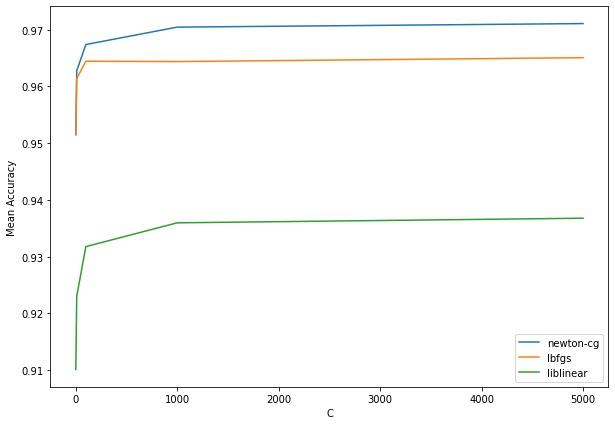

In [ ]:
plt.figure(figsize=(10,7))
x=[5000,1000,100, 10, 1]
y=df6["mean_test_score"].values
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.plot(x,y[0::3],label='newton-cg')
plt.plot(x,y[1::3],label='lbfgs')
plt.plot(x,y[2::3],label='liblinear')
plt.legend()
plt.savefig('LR.jpg',dpi=300,bbox_inches='tight')

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(oversampled_X,new_oversampled_y, epochs=200)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y_test_encoded=LE.fit_transform(y_test)
y_train_encoded=LE.fit_transform(oversampled_y)

In [ ]:
y_train_encoded

array([1, 1, 1, ..., 3, 3, 3])

In [ ]:
y_test_encoded

array([1, 2, 1, ..., 1, 1, 0])

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hostory=model.fit(oversampled_X,y_train_encoded,epochs=200,validation_data=(X_test,y_test_encoded))

Epoch 1/200
1649/1649 [==============================] - 4s 2ms/step - loss: 0.4384 - accuracy: 0.8660 - val_loss: 0.1697 - val_accuracy: 0.9269
Epoch 2/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.1098 - accuracy: 0.9668 - val_loss: 0.1119 - val_accuracy: 0.9477
Epoch 3/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0769 - accuracy: 0.9744 - val_loss: 0.1017 - val_accuracy: 0.9547
Epoch 4/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0639 - accuracy: 0.9777 - val_loss: 0.1059 - val_accuracy: 0.9512
Epoch 5/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0565 - accuracy: 0.9799 - val_loss: 0.0820 - val_accuracy: 0.9659
Epoch 6/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9817 - val_loss: 0.0781 - val_accuracy: 0.9652
Epoch 7/200
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0476 - accuracy: 0.9832 - val_loss: 0.0855 - val_ac

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(oversampled_X,y_train_encoded,epochs=400,validation_data=(X_test,y_test_encoded))

Epoch 1/400
1649/1649 [==============================] - 4s 2ms/step - loss: 0.4607 - accuracy: 0.8718 - val_loss: 0.1854 - val_accuracy: 0.9174
Epoch 2/400
1649/1649 [==============================] - 3s 2ms/step - loss: 0.1162 - accuracy: 0.9661 - val_loss: 0.1413 - val_accuracy: 0.9339
Epoch 3/400
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0800 - accuracy: 0.9741 - val_loss: 0.1034 - val_accuracy: 0.9552
Epoch 4/400
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9776 - val_loss: 0.0831 - val_accuracy: 0.9659
Epoch 5/400
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9805 - val_loss: 0.1004 - val_accuracy: 0.9559
Epoch 6/400
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9824 - val_loss: 0.0719 - val_accuracy: 0.9685
Epoch 7/400
1649/1649 [==============================] - 3s 2ms/step - loss: 0.0470 - accuracy: 0.9838 - val_loss: 0.0711 - val_ac

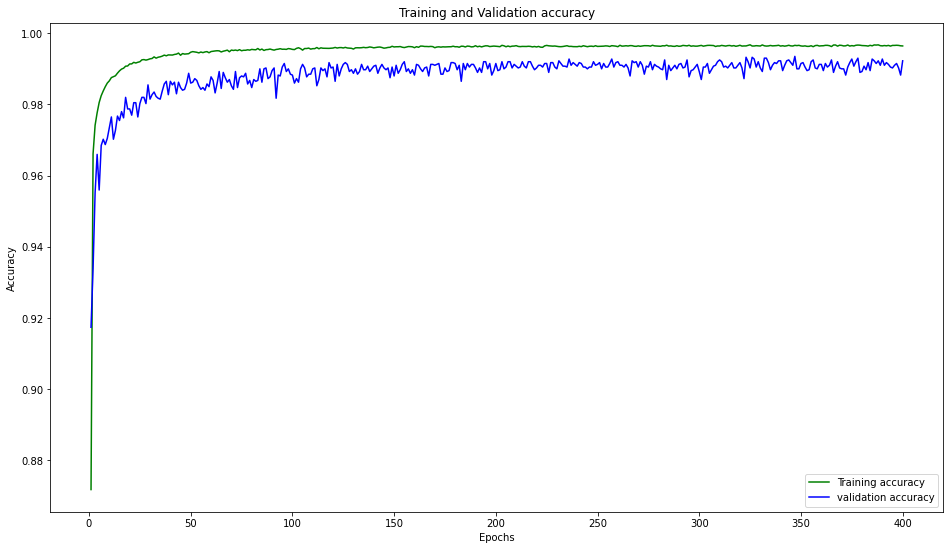

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(16,9))
epochs = range(1,401)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc , 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('NNepochs.jpg')

NameError: ignored

In [ ]:
nx.head()

,x_Fe,x_Cr,x_Co,x_V,x_Mn,x_Al,x_Ni,Smix,VEC,Density,AverageBM
0,0.25,0.05,0.05,0.05,0.02,0.02,0.56,10.618502,8.80,7779.325595,172.22
1,0.25,0.05,0.05,0.05,0.02,0.04,0.54,11.105370,8.66,7654.702131,170.14
2,0.25,0.05,0.05,0.05,0.02,0.06,0.52,11.499067,8.52,7527.738295,168.06
3,0.25,0.05,0.05,0.05,0.02,0.08,0.50,11.829861,8.38,7398.621195,165.98
4,0.25,0.05,0.05,0.05,0.04,0.02,0.54,11.105370,8.74,7711.655173,171.02


<Figure size 1152x648 with 0 Axes>

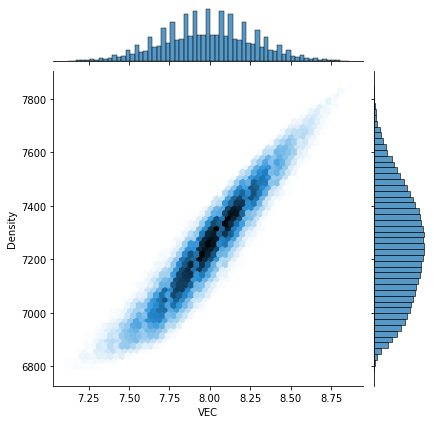

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.jointplot(x='VEC',y='Density',data=nx,kind='hex')